# Home Assignment No. 1: Practice

To solve this task efficiently, here are some practical suggestions:

* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that tutorials, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, the whole life?).


* Instead of rewriting existing code, if not explicitly asked to do so, use **BUILT-IN METHODS** available in the libraries. There exists a class/method for almost everything you can imagine (related to this homework).


* To complete this part of the homework, you have to write some **CODE** directly inside the specified places in the notebook **CELLS**.


* In some problems you are asked to provide a short discussion of the results. In these cases you have to create a **MARKDOWN** cell with your comments right after the corresponding code cell.


* For every separate problem, you can get **INTERMEDIATE scores**.


* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if a reviewer executes your code, the output will be the same (with all the corresponding plots) as in your uploaded files. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudo randomness.


* Your code must be readable to any competent reviewer. For this purpose, try to include **necessary** (and not more) comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY**.


* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameter and set it to `-1` to use all the cores.


* **IMPORTANT:** In the end you need to hand in a **single zip file** containing **two notebooks** (theory and practice) as well as the **html exported versions** of these notebooks. That is **4** files in total.


To begin let's import the essential (for this assignment) libraries.

In [1]:
import numpy as np

# for reproducibility
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Least Mean Squares

In the **regression** problem objects (feature vectors) $\mathbf{x}^{(1)}, \dots, \mathbf{x}^{(m)} \in \mathbb{R}^d$ have real-valued labels $y^{(1)}, \dots, y^{(m)} \in \mathbb{R}$.

In Least Mean Squares the hypothesis function is given by a linear combination of the features $h_{\theta}(\mathbf{x}) = \mathbf{\theta}^\top \mathbf{x}$.

The maximum likelihood estimator for the Least Mean Squares problem is the solution of the following optimization problem.

$$
\theta^{*} = \arg \min_{\theta} \|\mathbf{X}\theta - \mathbf{y}\|^2,
$$

where $\mathbf{X}$ is a $m\times d$ matrix that has the feature vectors as rows and $\mathbf{y} \in \mathbb{R}^m$ is a vector consisting of all the labels.

This problem is known to have a unique closed-form solution in the case of a full-rank $\mathbf{X}$. 

$$
\theta^{*} = (\mathbf{X}^\top\mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

In the first part of this assignment you are asked to implement this solution. With $X$, the hypothesis function is written as
$$
h_\theta(\mathbf{X}) = \mathbf{X}\theta = \begin{pmatrix}
1 & x^{(1)}_1 & \dots & x^{(1)}_d \\
\vdots & \vdots & \vdots & \vdots \\
1 & x^{(m)}_1 & \dots & x^{(m)}_d\\
\end{pmatrix}\begin{pmatrix}
\theta_0 \\ \theta_1 \\ \vdots \\ \theta_d
\end{pmatrix}.
$$

## Task 1: Regressor Class [10 points]

In this task you are asked to implement a regressor class that fits the Least Squares parameters to the data and performs predictions at new data points. You need to implement 3 methods: fit, predict and score. `fit` estimates and stores the coefficients of the linear regression in *self.coef_*. `predict` performs prediction using the estimated coefficients. `score` calculates the mean squared error. 

In [2]:
class LeastSquares(object):
    def __init__(self, regrtype: str = 'linear'):
        """
        Initialize the model parameters.

        :param regrtype: string denoting type of regression, default is linear, other option is affine
        """
        # Initialize parameters
        self.coef_ = None
        self.intercept_ = None
        self.regrtype = regrtype
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Calculate the weights (self.coef_) of the model based on training data.

        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        """
        # Add a columns of ones to the matrix to account for shift parameter
        X_1 = np.c_[np.ones(X.shape[0]), X] 

        # Calculate weights (theta) using normal equations
        theta = np.linalg.inv(X_1.T @ X_1) @ X_1.T @ y

        # Separate weights into intercept and shift parameter
        self.coef_ = theta[1:]
        self.intercept_ = theta[0]
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predicts labels y based on input samples X.

        :param X: array of shape (m, d)
        :param regrtype: string denoting type of regression, default is linear, other option is affine
        :return: array of shape (m,)
        """
        # Check, if model has been fitted
        assert self.coef_ is not None, "Fit the model first!"

        # Add a columns of ones to the matrix to account for shift parameter
        X_1 = np.c_[np.ones(X.shape[0]), X] 
        
        # Predict labels
        if self.regrtype == 'linear':
            predictions = X_1 @ np.r_[0, self.coef_] # Case for linear regression
        if self.regrtype == 'affine':
            predictions = X_1 @ np.r_[self.intercept_, self.coef_] # Case for affine regression
        
        # Check shapes of predictions to test plausibility
        assert predictions.shape == (X.shape[0],), "Check shapes!"
        
        # Return predictions
        return predictions
    
    def score(self, X: np.ndarray, y: np.ndarray) -> np.float64:
        """
        Calculates mean squared error.
        
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        :return: single number
        """
        # Make predictions on X
        predictions = self.predict(X)

        # Calculate mean squared  (MSE)
        mse_score = np.mean((predictions - y)**2)

        # Return MSE score
        return mse_score

## Task 2. Regression Line [10 points]

In this task, your goal is to visualize the **regression line** of **Least Mean Squares** applied to a synthetic dataset. In the cell below we generate the dataset.

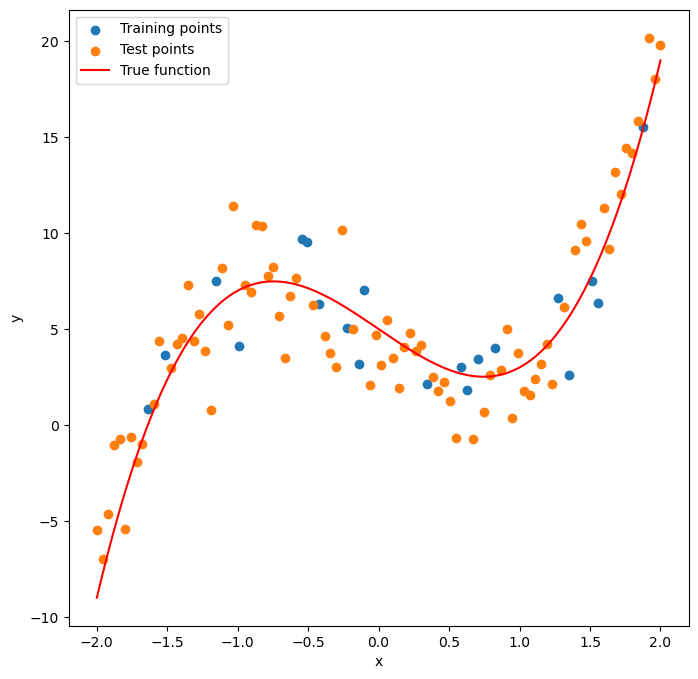

In [3]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

def f(X, noise_rate: float = 0):
    return 3 * X**3 - 5 * X + 5 + noise_rate * np.random.randn(X.shape[0])

n_samples = 100
X = np.linspace(-2, 2, n_samples)
y = f(X, noise_rate=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=True, random_state=0)

fig = plt.figure(figsize=(8, 8))

plt.scatter(X_train, y_train, label="Training points")
plt.scatter(X_test, y_test, label="Test points")
plt.xlabel('x')
plt.ylabel('y')

xrange = np.linspace(-2, 2, 1000)
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")
plt.plot()

plt.legend()
plt.show()

In [4]:
print(X.shape)
print(y.shape)

(100,)
(100,)


Fit your model to the training data and visualize the predictions on the same plot with the data points. Report the mean squared error on the training and test data.

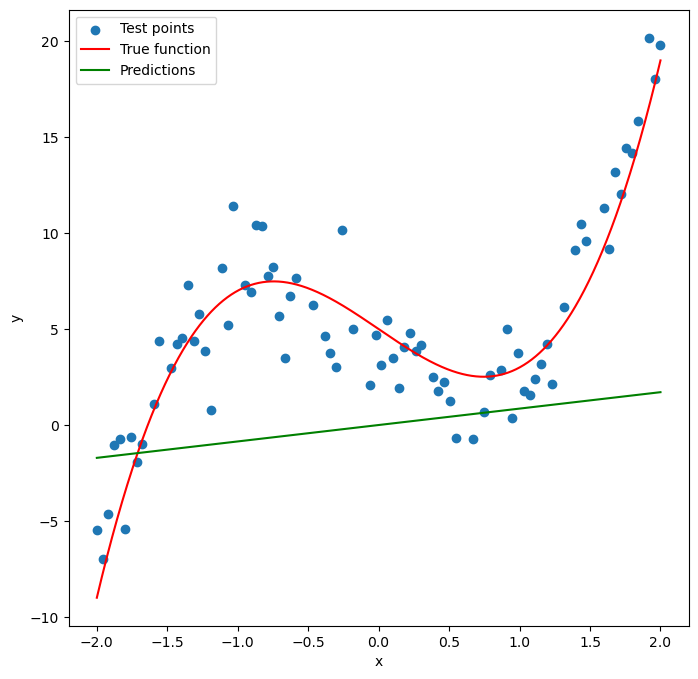

Train MSE score: 39.178684018257954, test MSE score: 48.74820521951773


In [5]:
# Initalize LeastSquares class
model = LeastSquares()

# Fit model with linear regression
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)

# Generate figure
fig = plt.figure(figsize=(8, 8))
plt.scatter(X_test, y_test, label="Test points")
xrange = np.linspace(-2, 2, 1000)
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")
results = np.c_[X_test, y_pred]
sorted_indices = np.argsort(X_test)
sorted_results = results[sorted_indices]
plt.plot(sorted_results[:,0], sorted_results[:,1], c="g", label="Predictions")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Print scores
print(f"Train MSE score: {train_score}, test MSE score: {test_score}")

You may notice that the prediction is far from being accurate. In this example the features are 1-dimensional. So the hypothesis function has the form $\theta x$, where both $\theta$ and $x$ are real numbers. Hence, the regression line has to go through the point (0, 0), which leads to inaccuracies, when $y$ is biased, as in the example above. To overcome this, a common practice is to add an additional column of 1s to the data matrix $\mathbf{X}$. This will model the intercept of the regression line.

Implement this and visualize/report the results.

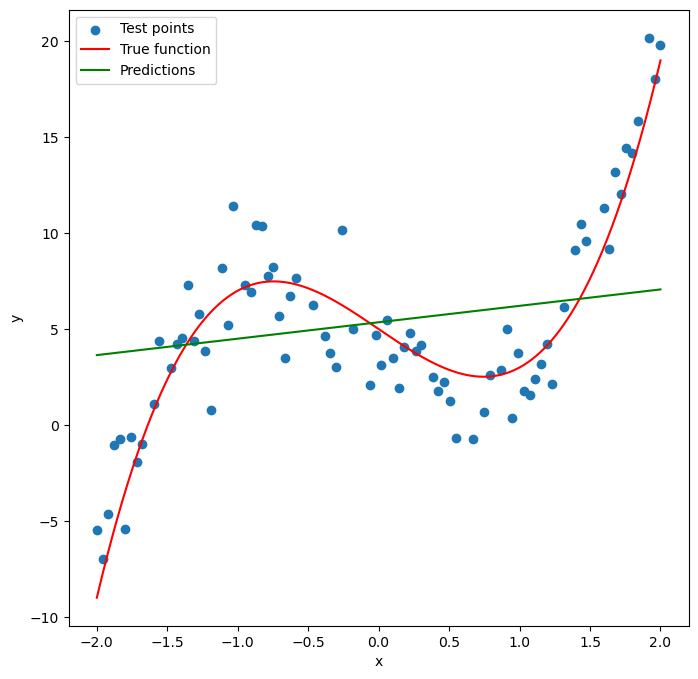

Train MSE score: 10.505999757669576, test MSE score: 23.222364478406426


In [6]:
# Initalize LeastSquares class
model = LeastSquares(regrtype='affine')

# Fit model with linear regression
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)

# Generate figure
fig = plt.figure(figsize=(8, 8))
plt.scatter(X_test, y_test, label="Test points")
xrange = np.linspace(-2, 2, 1000)
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")
results = np.c_[X_test, y_pred]
sorted_indices = np.argsort(X_test)
sorted_results = results[sorted_indices]
plt.plot(sorted_results[:,0], sorted_results[:,1], c="g", label="Predictions")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Print scores
print(f"Train MSE score: {train_score}, test MSE score: {test_score}")

The additional column of ones in the vector $\mathbf{X}$ such that
$$
\mathbf{X} = \begin{pmatrix}
1 & (\mathbf{x}^{(1)})^\top \\
\vdots & \vdots \\
1 & (\mathbf{x}^{(m)})^\top
\end{pmatrix}
$$ 
allows the model to ascertain the shift parameter of the affine function, performin affine regression, rather than linear regression. Thus, the resulting predicted line is shifted by a constant $\theta_0$ as compared to the linear regression. As one can see, the test MSE of roughly 23 in this case is significantly lower than for the version without shifting parameter, where the MSE was roughly 49. In terms of MSE therefore, the model improved by more than 50 percent!

# Locally Weighted Linear Regression

As you may observe in the previous task, linear models have difficulties with fitting non-linear functions. One way to overcome this could be to consider non-linear modifications of the original features in the model. We will leave this for later. Another way is to do Locally Weighted Regression (LWR). 

In LWR a separate regression is fitted and used to predict the outcome at each query poins. The training examples are weighted according to their similarity to the query point (in the simplest form, the distance to the query point is used). That is, for a data point $\mathbf{x}^{(0)} \in \mathbb{R}^d$ the prediction is given by:

$$
\hat y^{(0)} = \theta^*(\mathbf{x}^{(0)})^\top \mathbf{x}^{(0)}
$$

where

$$
\theta^*(\mathbf{x}^{(0)}) = \arg \min_{\theta(\mathbf{x}^{(0)})} \sum_{i = 1}^m w^{(i)}(\mathbf{x}^{(0)}) \left(y^{(i)} - \theta(\mathbf{x}^{(0)})^\top \mathbf{x}^{(i)}\right)^2
$$

Let $W(\mathbf{x}^{(0)})$ be a $m\times m$ diagonal matrix with $w^{(i)}(\mathbf{x}_0)$ on the $i$-th diagonal element. Then under the same assumptions as for LMS a closed form solution can be derived for $\hat y_0$.

$$
\hat y^{(0)} = (\mathbf{x}^{(0)})^\top (\mathbf{X}^\top W(\mathbf{x}^{(0)}) \mathbf{X})^{-1} X^\top W(\mathbf{x}^{(0)}) \mathbf{y}.
$$
The vector $\mathbf{y}$ is here given by $\mathbf{y}^\top = (y^{(1)}, \dots , y^{(m)})$.

## Task 3. Implement LWR [15 points]

In this task you need to implement a class that preforms Locally Weighted Linear Regression. As the model is fitted again for every new query point, the `fit` method only needs to memorise the dataset. You are asked to implement 3 methods: kernel, predict_ and score. `kernel` constructs the $W(\mathbf{x}^{(i)})$ matrix. Let's consider a specific kernel here, that is given by:

$$
w^{(i)}(\mathbf{x}^{(0)}) = \exp\left(- \frac{\|\mathbf{x}^{(0)} - \mathbf{x}^{(i)}\|^2}{2 \tau^2}\right)
$$

`predict_` performs prediction for a single data sample. `score`, as before, calculates the mean squared error.

In [7]:
class LocalLeastSquares(object):
    def __init__(self, tau: float, regrtype: str = 'linear'):
        """
        Initialize the parameters.

        :param tau: float number denoting the weighting factor of a local sample
        :param regrtype: string denoting type of regression, default is linear, other option is affine
        """
        # Initialize parameters
        self.tau_ = tau
        self.X_ = None
        self.y_ = None
        self.coef_ = None
        self.intercept_ = None
        self.regrtype = regrtype
        
    def kernel(self, x: np.ndarray) -> np.ndarray:
        """
        Generates the weighting matrix based on a sample x.

        :param x: array of shape (d,)
        :return: array of shape (m, m)
        """
        # Calculate diagonal elements of weighting matrix W
        elements = np.array([np.exp(-np.sum(x - x_s)**2*(2*self.tau_**2)**(-1)) for x_s in self.X_])  

        # Arrange elements in a diagonal matrix and return it
        return np.diag(elements)
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Memorizes the data.

        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        """
        # Memorize data
        self.X_ = np.c_[np.ones(X.shape[0]), X]
        self.y_ = y
                
    def predict_(self, x: np.ndarray) -> np.float64:
        """
        Predicts the outcome for a prediction at x.

        :param x: array of shape (d,)
        :return: single number, prediction at x
        """
        # Check, if model has been fitted yet
        assert self.X_ is not None and self.y_ is not None, "Fit the model first!"

        # Calculate weighting matrix W at x
        W = self.kernel(x)

        # Calculate model parameters
        theta = np.linalg.inv(self.X_.T @ W @ self.X_) @ self.X_.T @ W @ self.y_
        
        # Assign model parameters
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

        # Calculate prediction
        if self.regrtype == 'linear':
            return x.T @ np.r_[0, self.coef_]
        if self.regrtype == 'affine':
            return x.T @ np.r_[self.intercept_, self.coef_]

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Makes predictions for the whole dataset X.

        :param X: array of shape (m, d)
        :return: array of shape (m,)
        """
        # Add extra column of ones to X to account for intercept parameter
        X_1 = np.c_[np.ones(X.shape[0]), X]

        # calculate predictions
        predictions = np.array([self.predict_(x) for x in X_1])
        
        # Check shapes of predictions to test plausibility
        assert predictions.shape == (X.shape[0],), "Check shapes!"

        # Return predictions
        return predictions
        
    def score(self, X: np.ndarray, y: np.ndarray) -> np.float64:
        """
        Calculates mean squared error.
        
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        :return: single number
        """
        # Make predictions on X
        predictions = self.predict(X)

        # Calculate mean squared  (MSE)
        mse_score = np.mean((predictions - y)**2)

        # Return MSE score
        return mse_score

Visualize the resulting regression line along with the data points and train/test MSE, as done in the previous examples.

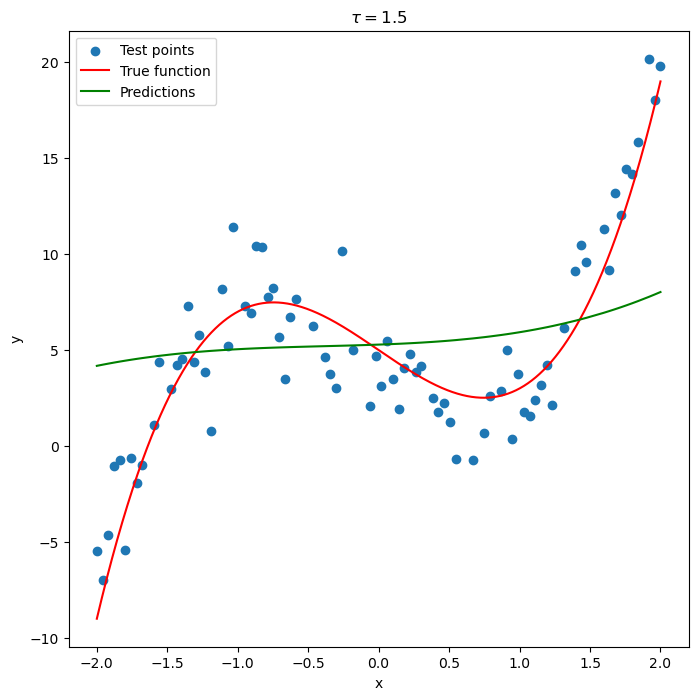

Train MSE score: 9.362779687888898, test MSE score: 22.075555373772996


In [8]:
# Initalize LeastSquares class
tau = 1.5
model = LocalLeastSquares(tau=tau, regrtype='affine')

# Fit model with linear regression
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)

# Generate figure
fig = plt.figure(figsize=(8, 8))
plt.title(f'$\\tau = {tau}$')
plt.scatter(X_test, y_test, label="Test points")
xrange = np.linspace(-2, 2, 1000)
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")
results = np.c_[X_test, y_pred]
sorted_indices = np.argsort(X_test)
sorted_results = results[sorted_indices]
plt.plot(sorted_results[:,0], sorted_results[:,1], c="g", label="Predictions")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Print scores
print(f"Train MSE score: {train_score}, test MSE score: {test_score}")

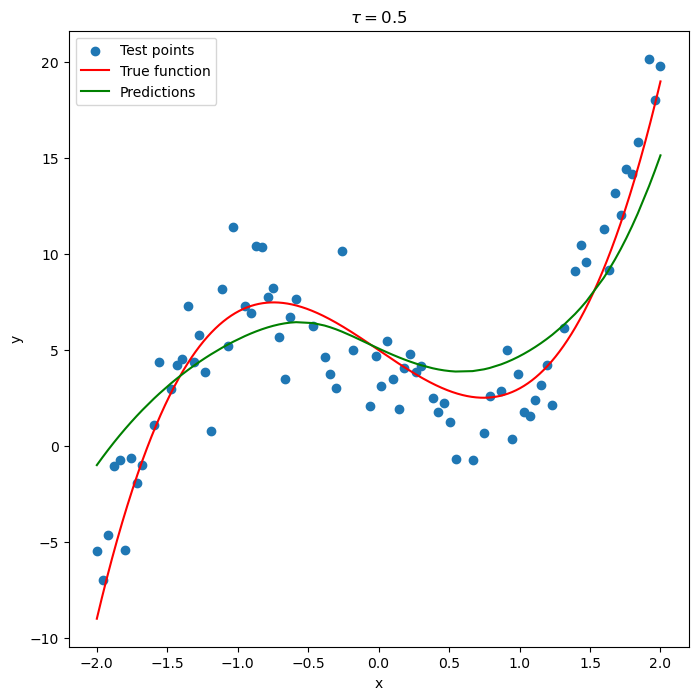

Train MSE score: 3.82794330003613, test MSE score: 8.03698044218477


In [9]:
# Initalize LeastSquares class
tau = 0.5
model = LocalLeastSquares(tau=tau, regrtype='affine')

# Fit model with linear regression
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)

# Generate figure
fig = plt.figure(figsize=(8, 8))
plt.title(f'$\\tau = {tau}$')
plt.scatter(X_test, y_test, label="Test points")
xrange = np.linspace(-2, 2, 1000)
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")
results = np.c_[X_test, y_pred]
sorted_indices = np.argsort(X_test)
sorted_results = results[sorted_indices]
plt.plot(sorted_results[:,0], sorted_results[:,1], c="g", label="Predictions")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Print scores
print(f"Train MSE score: {train_score}, test MSE score: {test_score}")

## Task 4. Tune the hyperparameters [7 points]

$\tau$ is an important hyperparameter that can regulate overfitting of the method. Choose an optimal value of $\tau$ in order to minimize the residual sum of squares on the left out data.

In [10]:
# Optimize the hyperparameter tau
tau_values = np.linspace(0.1, 5, 100)

# Initailize variables for hyperparameter tuning
optimal_tau = np.inf
score = np.inf

# Iterate over all proposed values for tau
for tau in tau_values:
    # Initalize LeastSquares class with current tau value
    model = LocalLeastSquares(tau=tau, regrtype='affine')

    # Fit model with linear regression
    model.fit(X_train, y_train)

    # Calculate test score
    test_score = model.score(X_test, y_test)

    # Check condition
    if test_score < score:
        score = test_score
        optimal_tau = tau

# Additional iteration loop
tau_values = np.linspace(optimal_tau - 0.1*optimal_tau, optimal_tau + 0.1*optimal_tau, 100)

# Iterate over all proposed values for tau
for tau in tau_values:
    # Initalize LeastSquares class with current tau value
    model = LocalLeastSquares(tau=tau, regrtype='affine')

    # Fit model with linear regression
    model.fit(X_train, y_train)

    # Calculate test score
    test_score = model.score(X_test, y_test)

    # Check condition
    if test_score < score:
        score = test_score
        optimal_tau = tau

# Print optimal tau
print('Optimal tau = ', optimal_tau)

Optimal tau =  0.24522191613100708


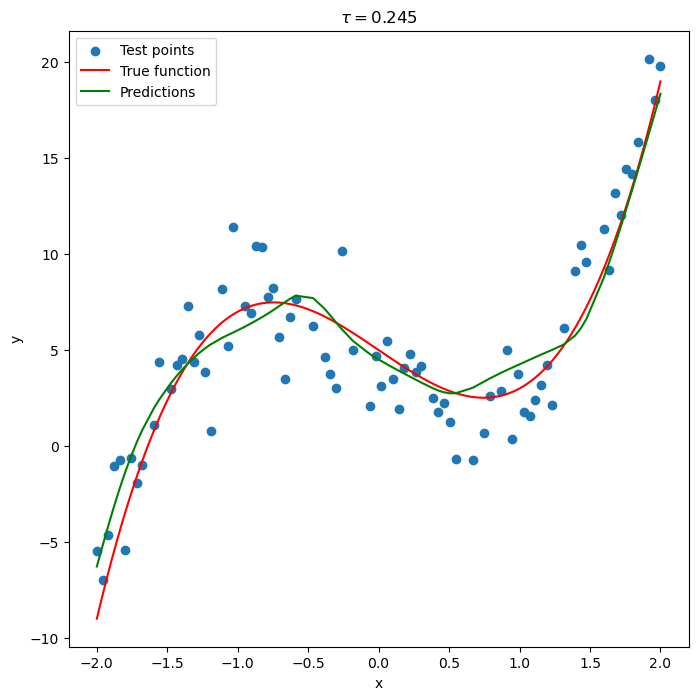

Train MSE score: 2.03098109251012, test MSE score: 4.865928059234333


In [11]:
# Initalize LeastSquares class
model = LocalLeastSquares(tau=optimal_tau, regrtype='affine')

# Fit model with linear regression
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)

# Generate figure
fig = plt.figure(figsize=(8, 8))
plt.title(f'$\\tau = {round(optimal_tau,3)}$')
plt.scatter(X_test, y_test, label="Test points")
xrange = np.linspace(-2, 2, 1000)
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")
results = np.c_[X_test, y_pred]
sorted_indices = np.argsort(X_test)
sorted_results = results[sorted_indices]
plt.plot(sorted_results[:,0], sorted_results[:,1], c="g", label="Predictions")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Print scores
print(f"Train MSE score: {train_score}, test MSE score: {test_score}")

What is the effect of different values for $\tau$?

The effect of different values for $\tau$ is that the resulting regression line gets closer and closer to the true function. However, as $\tau$ gets so small that only two sample points are considered at a reasonable high weight, the regression curve gets very noisy. That already begins to start at the optimal value for tau at $\tau_{opt} = 0.245$ (in terms of MSE), a regression curve for, say, $\tau = 0.5$ looks much smoother.

What are advantages/disadvantages of the LWR method?

The LWR allows to implement something similar to a sliding average. It hence allows to give educated guesses on future outcome of experiments based on a trendline given by the locally weighted linear (affine) regression.

However, in terms of scientific knowledge gain, a locally weighted linear model does not seem to contribute significantly. If one can establish a general affine or linear relationship between data $x$ and $y$ as $y \approx \theta_1 x + \theta_0$, then one has gained more solid knowledge than in the case of locally weighted linear regression, where one can only establish the linear correlation in a suffiently small window of data.

# Logistic Regression

Now let's consider **classification** task. In the **binary classification** problem objects (feature vectors) $\mathbf{x}_{1}, \dots, \mathbf{x}_{m} \in \mathbb{R}^d$ have binary labels $y_{1}, \dots, y_{m} \in \{0, 1\}$.

Using a **linear combination** of the features $\mathbf{\theta}^\top \mathbf{x}$, like in Least Mean Squares, will result in an unbounded estimator. However, we would like to have a mapping $f_{\mathbf{\theta}}: \mathbb{R}^d \to \{0, 1\}$, the output of which can be naturally interpreted as the probability of belonging to class 1.

In **Logistic Regression** the resulting dot-product $\mathbf{\theta}^\top \mathbf{x}$ is converted to the unit interval with the **sigmoid** function:

$$g(z) = \frac{1}{1 + e^{-z}}$$

This gives us the hypothesis function:

$$f_{\mathbf{\theta}}(\mathbf{x}) = g(\mathbf{\theta}^{\top}\mathbf{x}) = \frac{1}{1 + e^{-\mathbf{\theta}^{\top}\mathbf{x}}}$$

Now, we only need to set a **threshold** (for example, 0.5) for classifying an object to the 1st class.

The sigmoid functino $g(z)$ can be rewritten as 
$$
g(z) = \frac{1}{1+ e^{-z}} = \frac{e^z}{1+e^z},
$$ 
which can be used as an alternate form for large negative values of $z$.

## Task 5. Sigmoid [4 points]

Implement and plot the sigmoid function. 

**Important!** Your function should work for inputs of arbitrary shape. The sigmoid should be applied elementwise. The returned array should have the same shape as the input. 

**Important!!** For large negative input, computing the exponent in the sigmoid may result in overflow. Use an alternative form of the sigmoid for the negative entries of the input to deal with this issue.

**Hint:** An alternative form can be obtained by multiplying the nominator and the denominator of the sigmoid by $e^z$.

In [12]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    """
    Calculate the sigmoid of every entry of a given matrix z of arbitrary shape.

    :param z: array of arbitrary shape
    """
    # Implement function
    def elementwise_sigmoid(x):
        """
        Gives the sigmoid of a scalar.

        :param x: scalar
        """
        # Use different writing styles of the sigmoid function for positive or negative values
        if x < 0:
            return np.e**(x)*(1 + np.e**x)**(-1)
        else:
            return (1 + np.e**(-x))**(-1)

    # Define vectorized sigmoid function
    vectorized_sigmoid = np.vectorize(elementwise_sigmoid)

    # Return sigmoid applied to every element of z
    return vectorized_sigmoid(z)

In [13]:
# This should not raise a warning
sigmoid(np.array([-1000]))

array([0.])

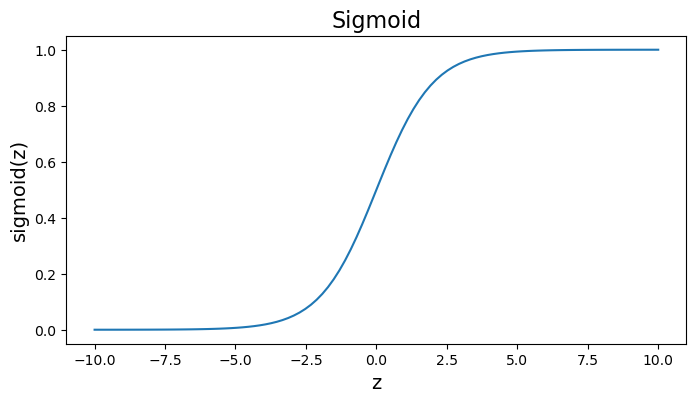

In [14]:
z = np.linspace(-10, 10, 100)

plt.figure(figsize=(8, 4))

plt.plot(z, sigmoid(z))

plt.title('Sigmoid', size=16)

plt.xlabel('z', size=14)
plt.ylabel('sigmoid(z)', size=14)

plt.show()

Thus, the conditional probabilities of belonging to class 1 or 0 are as follows:

$$\begin{align}
    p(y = 1| \mathbf{x}; \mathbf{\theta}) &= f_{\mathbf{\theta}}(\mathbf{x}) = f_{\mathbf{\theta}}(\mathbf{x}) = g(\mathbf{\theta}^{\top}\mathbf{x}) = \frac{1}{1 + e^{-\mathbf{\theta}^{\top}\mathbf{x}}}\\
    p(y = 0| \mathbf{x}; \mathbf{\theta}) &= 1 - f_{\mathbf{\theta}}(\mathbf{x})
\end{align}$$

Or one could rewrite it as:

$$p(y| \mathbf{x}; \mathbf{\theta}) = f_{\mathbf{\theta}}(\mathbf{x})^{y}\bigl[1 - f_{\mathbf{\theta}}(\mathbf{x})\bigr]^{1 - y}$$

&nbsp;

Now, to **estimate** the weights $\mathbf{\theta}$, we will **maximize** the **likelihood** function (more precisely, its logarithm for simpler calculations). Therefore, this method is called the **maximum likelihood estimation** (MLE).

$$\ln{\mathcal{L}(\mathbf{\theta})} = \mathcal{l}(\mathbf{\theta}) = \sum\limits_{i = 1}^m p(y^{(i)}| \mathbf{x}^{(i)}; \mathbf{\theta}) = \sum\limits_{i = 1}^m y^{(i)} \ln{\bigl[f_{\mathbf{\theta}}(\mathbf{x}^{(i)}) \bigr]} + (1 - y^{(i)})\ln{\bigl[1 - f_{\mathbf{\theta}}(\mathbf{x}^{(i)}) \bigr]} \to \max\limits_{\mathbf{\theta}}$$

## Task 6. Log-Likelihood [3 points]

Let $\mathbf{X} = \begin{bmatrix} \mathbf{x}_1^{\top} \\ \vdots \\ \mathbf{x}_m^{\top} \end{bmatrix} \in \mathbb{R}^{m \times d}$ be the data matrix, $\mathbf{y} = \begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix} \in \mathbb{R}^{m}$ be the labels vector corresponding to $\mathbf{X}$ and $\mathbf{\theta} = \begin{bmatrix} \theta_1 \\ \vdots \\ \theta_d \end{bmatrix} \in \mathbb{R}^{d}$ be the parameters vector.

Implement the log-likelihood for Logistic Regression.

**Note:** You have already implemented the sigmoid function. Now it is time to use it.

In [15]:
def log_likelihood_log_reg(theta, X, y):
    """
    Implements the log-likelihood for logistic regression.

    :param theta: weights matrix
    :param X: features matrix
    :param y: labels vector (matrix)
    :return: log-likelihood for logistic regression
    """
    # Define list to store summands
    summands = []

    # Calculate contribution to maximum likelihood estimation for each data sample
    for x, y_ in zip(X, y):
        f_theta = sigmoid(theta.T @ x)
        summands.append(y_*np.log(f_theta) + (1-y_)*np.log(1-f_theta))
    
    # Return sum of elements = maximum likelihood estimatino
    return sum(summands)

In [16]:
m = 100
d = 2

X = np.random.randint(low=-10, high=10, size=(m, d))
y = np.random.randint(low=0, high=1, size=(m, 1))
theta = np.zeros((d, 1))

assert np.allclose(log_likelihood_log_reg(theta, X, y),
                   -m * np.log(2),
                   atol=1e-8), "Houston, we have a problem!"
print("Well done!")

Well done!


## Task 7. Gradient Descent [8 points]

Now, to find the weights $\mathbf{\theta}$, we need to solve the optimization problem described above. Let's use [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent).

Since the gradient descent solves the **minimization** problem, we will change the maximization problem described above to the minimization problem by changing the sign of the log-likelihood function to negative:

$$\mathcal{l}(\mathbf{\theta}) \to \max\limits_{\mathbf{\theta}} \Longleftrightarrow -\mathcal{l}(\mathbf{\theta}) \to \min\limits_{\mathbf{\theta}}$$

So, let's first implement a function to compute the gradient of the **negative** log-likelihood function.

The gradient is a column vector that has **the same shape as** $\mathbf{\theta}$.

The new function $\mathcal{L}(\theta)$ to minimize is hence
$$
\mathcal{L}(\theta) = -\sum_{i=1}^{m} \left(
    y^{(i)}\ln\left[
        \frac{1}{1+e^{-\theta^\top \mathbf{x}^{(i)}}}
    \right] + (1-y^{(i)})\ln\left[
        1-\frac{1}{1+e^{-\theta^\top \mathbf{x}^{(i)}}}
    \right]
\right) = -\sum_{i=1}^{m} \left(
    y^{(i)}\ln\left[
        f_\theta(\mathbf{x}^{(i)})
    \right] + (1-y^{(i)})\ln\left[
        1-f_\theta(\mathbf{x}^{(i)})
    \right]
\right).
$$ 
The gradient $\nabla_\theta \mathcal{L}(\theta)$ is given by
$$
\nabla_\theta \mathcal{L}(\theta) = \sum_{i=1}^{m} \left( \frac{1}{1 + e^{-\theta^\top \mathbf{x}^{(i)}}} - y^{(i)} \right) \mathbf{x}^{(i)} = \sum_{i=1}^{m} \left( f_\theta(\mathbf{x}^{(i)}) - y^{(i)} \right) \mathbf{x}^{(i)}
,
$$ which was obtained by plugging in the gradients
$$
\nabla_\theta \ln\left[f_\theta(\mathbf{x})\right] = \left[1-f_\theta(\mathbf{x})\right]\mathbf{x}, \qquad \nabla_\theta \ln\left[1-f_\theta(\mathbf{x})\right] = -f_\theta(\mathbf{x})\mathbf{x}
$$
into the above expression for $\mathcal{L}(\theta)$.

In [17]:
def negative_gradient_log_reg(theta, X, y):
    """
    Calculates the gradient of the negative log-likelihood for logistic regression with respect to the parameters theta.

    :param theta: weights matrix
    :param X: features matrix
    :param y: labels vector (matrix)
    :return: gradient of negative log-likelihood for logistic regression
    """
    # Define list to store summands
    summands = []

    # Calculate contribution to gradient of negative maximum likelihood estimation for each data sample
    for x, y_ in zip(X, y):
        f_theta = sigmoid(x.T @ theta)
        summands.append((f_theta - y_) * x)
    
    # Return sum of elements = maximum likelihood estimation
    return np.array(sum(summands))

Now implement the general gradient descent algorithm.

In [18]:
# Test the negative_gradient_log_reg function
negative_gradient_log_reg(theta, X, y)

array([-9.5,  8.5])

In [19]:
def gradient_descent(X, y, gradient, alpha=0.01, tolerance=1e-8, max_iters_number=100):
    """
    Performs gradient descent on given data X and y for logistic regression.

    :param X: data matrix of shape [m, d]
    :param y: labels of shape [m]
    :param gradient: a function to compute the gradient of the neg. log-likelihood
    :param alpha: learning rate
    :param tolerance: a value to detect convergence (if the norm of the update is smaller that tolerance, terminate)
    :param max_iters_number: maximum number of iterations of the algorithm
    :return: the final estimation for theta
    """
    # Define initialization parameters
    theta_0 = np.random.rand(X.shape[1], 1)

    # Add dimension, if y is 1-dimensional
    if y.ndim == 1:
        y = y[:, np.newaxis]
    
    # Add dimension, if theta_0 is 1-dimensional
    if theta_0.ndim == 1:
        theta_0 = theta_0[:, np.newaxis]

    # Define variables to store data
    old_theta = theta_0
    
    # Perform gradient descent
    for iter in range(0, max_iters_number):
        new_theta = old_theta - alpha*gradient(old_theta, X, y)[:, np.newaxis]
        update = np.sqrt(np.sum((new_theta-old_theta)**2))
        if update < tolerance:
            return new_theta
        if iter + 1 == max_iters_number:
            print('Maximum allowed iterations reached!')
            return new_theta
        old_theta = new_theta

In [20]:
# Generate data to test gradient descent algorithm
m = 1000
d = 5
X = np.random.randint(low=-1, high=1, size=(m, d))
theta = np.random.rand(d, 1)
y = sigmoid(X @ theta)

# Test gradient descent algorithm
print('Original theta = ', theta)
print('Found theta via gradient descent = ', gradient_descent(X, y, negative_gradient_log_reg, max_iters_number=500))

Original theta =  [[0.59262553]
 [0.64261009]
 [0.38494905]
 [0.66961994]
 [0.40411595]]
Found theta via gradient descent =  [[0.59262553]
 [0.64261009]
 [0.38494905]
 [0.66961994]
 [0.40411595]]


## Task 8. Classifier [10 points]

Let's create our own classifier class and then compare it with the [existing method in the sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

We need to implement three principal methods:

* `fit` to find the coefficients (weights) $\mathbf{\theta}$


* `predict` to predict the labels $\mathbf{\hat{y}}$ for the data matrix $\mathbf{X}$


* `score` to evaluate predictions (for example, with **mean accuracy** score)

In [21]:
def accuracy_score(predictions, labels):
    """
    Returns the accuracy of predictions when compared to the true labels.

    :param predictions: array containing the predicted labels
    :param labels: array containing the true labels
    :return: mean accuracy score of predictions
    """
    # Check, if shapes of predictions and labels match
    assert predictions.shape == labels.shape, "Check shapes!"
    
    # Calculate the deviations of predictions
    deviations = np.abs(predictions-labels)

    # Calculate and return mean accuracy
    return 1 - np.mean(deviations)

In [22]:
class LogReg(object):
    def __init__(self):
        """
        Constructor of the logistic regression class.
        """
        self.coef_ = None
        
    def fit(self, X, y):
        """
        Fits the logistic regression model to the data.

        :param X: array of shape (m, d) containing features
        :param y: array of shape (m,) containing labels
        """
        # Calculate weights (model fitting)
        self.coef_ = gradient_descent(X, y, negative_gradient_log_reg, max_iters_number=1000)
        
    def predict(self, X, threshold=0.5):
        """
        Predicts labels based on input array X.

        :param X: array of shape (m, d) containing features
        :param threshold: float number for decision boundary if label is true or false, default is 0.5
        :return: prediction of labels based on input array X
        """
        # Check, if model has been fitted yet
        assert self.coef_ is not None, "Fit the model first!"

        # Make predictions using the fitted model
        probabilities = np.squeeze(sigmoid(X @ self.coef_))
        predictions = np.array([1 if prob > threshold else 0 for prob in probabilities])

        # Check, if predictions shape match the expected shape
        assert predictions.shape == (X.shape[0],), "Check shapes!"
        
        # Return predictions
        return predictions
    
    def score(self, X, y):
        """
        Calculates the score on a dataset X, y of samples.

        :param X: array of shape (m, d) containing features
        :param y: array of shape (m,) containing labels
        :return: mean accuracy score of predictions versus labels
        """
        # Calculate and return score
        return accuracy_score(self.predict(X), y)

## Task 9. Decision Rule [6 points]

In this task, your goal is to visualize the **decision rule** of **Logistic Regression** applied to a synthetic $2$-dimensional dataset generated by a built-in `sklearn.datasets` method called `make_moons`. In the cell below we generate the dataset.

In [23]:
from sklearn.datasets import make_moons

In [24]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print(X.shape, y.shape)

(300, 2) (300,)


The goal is to fit our LogReg and sklearn's Logistic Regreesion classifiers to this data:

You have to plot the decision regions. The plots must have **titles**, which contain the names of the classifiers and the corresponding accuracy (rounded to only **two** decimal places).

You can write the plotting code on your own, but we highly recommend just to use [mlxtend](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) library (`pip install mlxtend`), which has a awesome one-line decision boundary plotting function.

In [25]:
# Test logistic regression class
my_logistic_regression = LogReg()
my_logistic_regression.fit(X_train, y_train)
print('Logistic regression accuracy = ', my_logistic_regression.score(X_test, y_test))

Logistic regression accuracy =  0.8444444444444444


In [26]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [27]:
# Define class instances for both self-made logistic regression and sklearn method
my_logistic_regression = LogReg()
logistic_regression = LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1)
classifiers = [my_logistic_regression, logistic_regression]
names = ['Self-made logistic regression', 'Sklearn logistic regression']

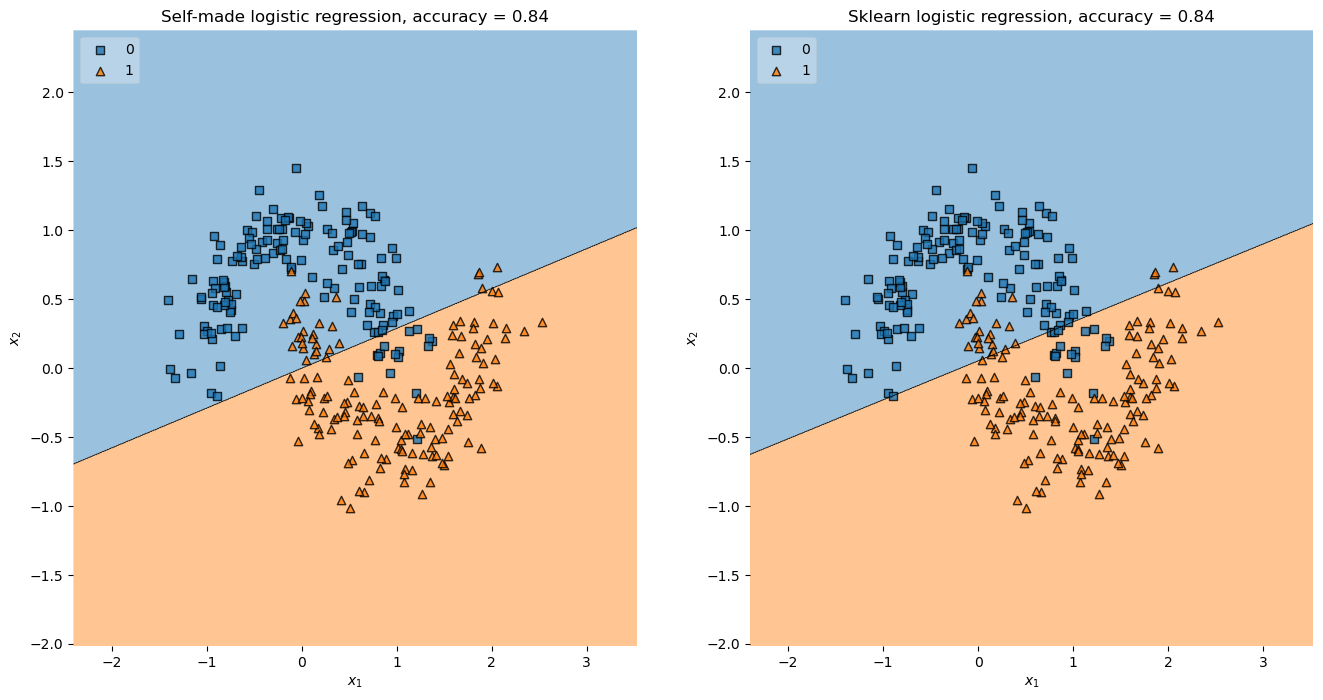

In [28]:
# Fit models and plot results
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

# Loop over models
for classifier, axis, name in zip(classifiers, axes.flat, names):
    classifier.fit(X_train, y_train)
    plot_decision_regions(X, y, clf=classifier, legend=2, ax=axis)
    axis.set_title(name + f', accuracy = {round(classifier.score(X_test, y_test), 2)}')
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')

## Task 10. Feature Engineering [7 points]

In the previous task, classifiers obviously failed fitting to data. This happened because the decision boundary of the classifier has a restricted linear form, while the data is much more complicated.

One may try to change the parameters of the classifier in order to improve accuracy, but linear models do not have parameters that can change the form of the decision rule.

In this case, the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing ones and fit the classifier for the new features. This may help low-complexity classifiers to fit complex data dependencies.

Your task is

* to achieve accuracy $> 0.95$, by generating additional features (e.g. polynomial),


* to plot decision rules in the original feature space,


* to write 2-3 sentences about why you chose these features.

It is your choice how to generate features. You may create hand-crafted features and add them manually.

Nevertheless, we **highly recommend** getting used to and applying the following built-in `sklearn` methods, for example:

* `PolynomialFeatures` for [feature generation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

* `StandardScaler`for [feature scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

* `Pipeline` - for [combining several operations](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) in a row (e.g. feature creation & prediction)

In [29]:
# Load necessary packages and functions
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [30]:
# Simple logistic regression
logistic_regression_simple = Pipeline([('LR', LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1))])

# Advanced logistic regression
logistic_regression_advanced = Pipeline([('FG', PolynomialFeatures(degree=5)), ('SC', StandardScaler()), ('LR', LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1))])

# Define lists for plotting
classifiers = [logistic_regression_simple, logistic_regression_advanced]
names = ['Simple logistic regression', 'Advanced logistic regression']

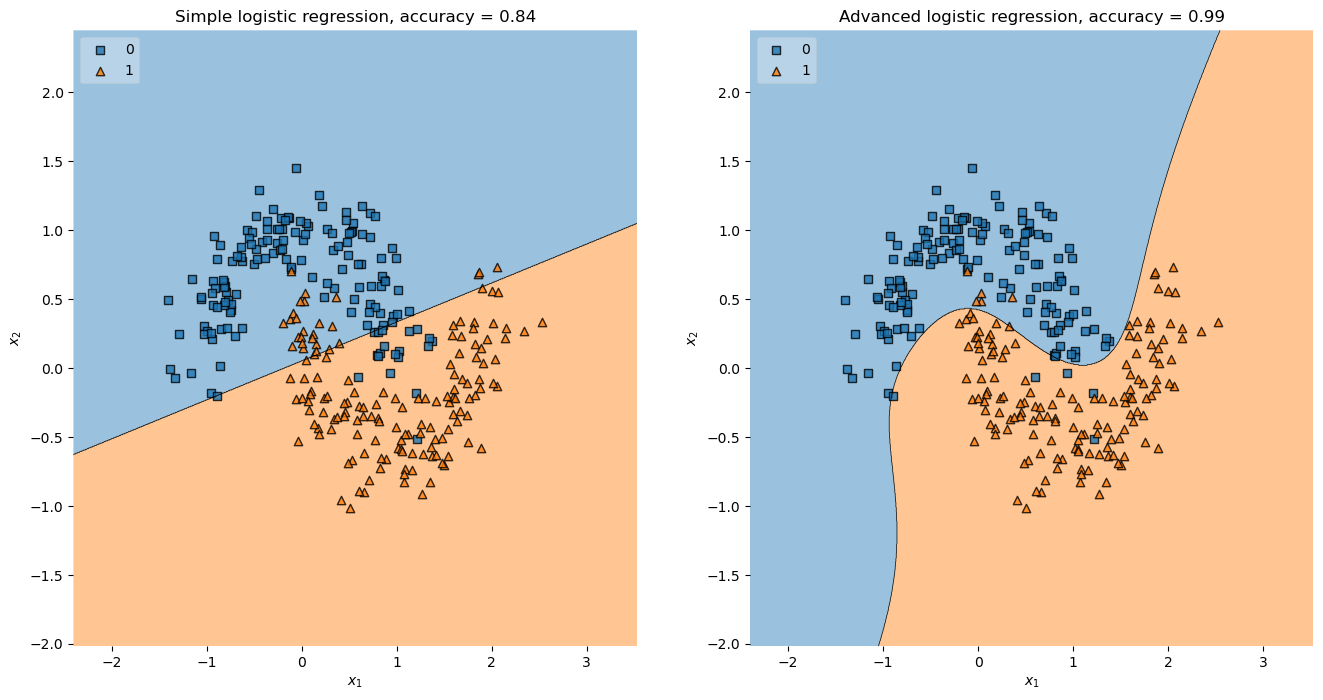

In [31]:
# Fit models and plot results
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

# Loop over models
for classifier, axis, name in zip(classifiers, axes.flat, names):
    classifier.fit(X_train, y_train)
    plot_decision_regions(X, y, clf=classifier, legend=2, ax=axis)
    axis.set_title(name + f', accuracy = {round(classifier.score(X_test, y_test), 2)}')
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')

Why did you choose these features?

The moons dataset features two intertwined moons. Plotted in the plane, one can separate them with an odd order polynomial such as a third-order polynomial $x_2(x_1) = a_0 + a_1x_1 + a_2x_1^2 + a_3x_1^3$ of appropriately chosen parameters $a_i, \, i \in \{0,1,2,3\}$. Since the separation line would ideally be a third- or higher order polynomial, polynomial feature generation of `degree = 5` was chosen; order 5 as compared to just order 3 to allow for more details/flexibility in the separation boundary.

# Face classification



In this task you will face a real-life problem of face detection. You have to train a model to classify 24 $\times$ 24 grayscale images to *face*/*non-face* classes.
First, let us import some libraries and load the data.

In [32]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [33]:
# Load the dataset
data = loadmat('faces.mat')
labels = np.squeeze(data['Labels'])
labels[labels == -1] = 0  # Want labels in {0, 1}
data = data['Data']
data.shape

(19832, 576)

Each datapoint is a 576-dimentional vector that stores pixel intensities of a flattened grayscale image.
If carefully reshaped, one can visualize the datapoints as 24$\times$24 images.

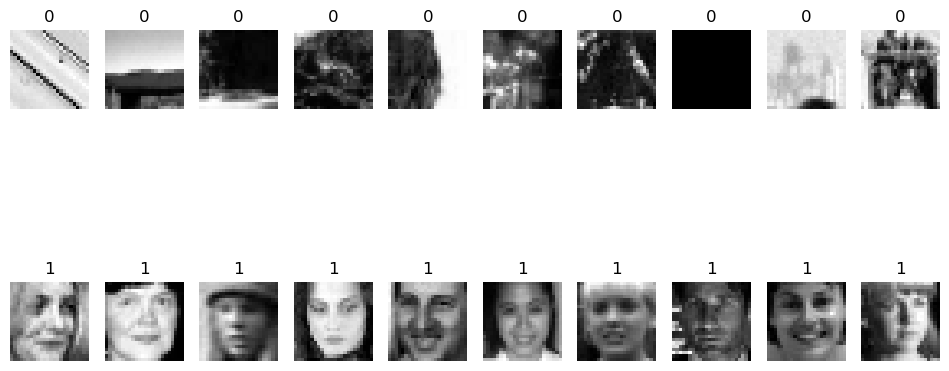

In [34]:
# Visualize some examples from the dataset.
samples_per_class = 10
classes = [0, 1]
imgs = np.reshape(data, [-1, 24, 24], order='F')

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.equal(labels, cls))
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = y * samples_per_class + i + 1
        plt.subplot(len(classes), samples_per_class, plt_idx)
        plt.imshow(imgs[idx])
        plt.axis('off')
        plt.title(cls)
plt.show()

Now let us split the dataset into train and test. This will allow to assess the ability of our models to generalize to unseen data.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
num_train = X_train.shape[0]
num_test = X_test.shape[0]

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (13882, 576)
Training labels shape:  (13882,)
Test data shape:  (5950, 576)
Test labels shape:  (5950,)


## Task 11. Logistic Regression for Face Classification [5 points]

Now fit your *LogReg* class on *(X_train, y_train)* and report the accuracy on both the **train** and **test** sets.

**Warning:** It may take time to fit your model to this amount of data.

In [36]:
# Fit model to the data
facedetection = LogReg()
facedetection.fit(X_train, y_train)

Maximum allowed iterations reached!


In [37]:
# Report scores on training and testing data
print('Accuracy of LogReg on training data = ', facedetection.score(X_train, y_train))
print('Accuracy of LogReg on testing data = ', facedetection.score(X_test, y_test))

Accuracy of LogReg on training data =  0.9135571243336695
Accuracy of LogReg on testing data =  0.9122689075630253


Visualize the learned coefficients as a grayscale image. Reshape the coefficients and use *plt.imshow()*.

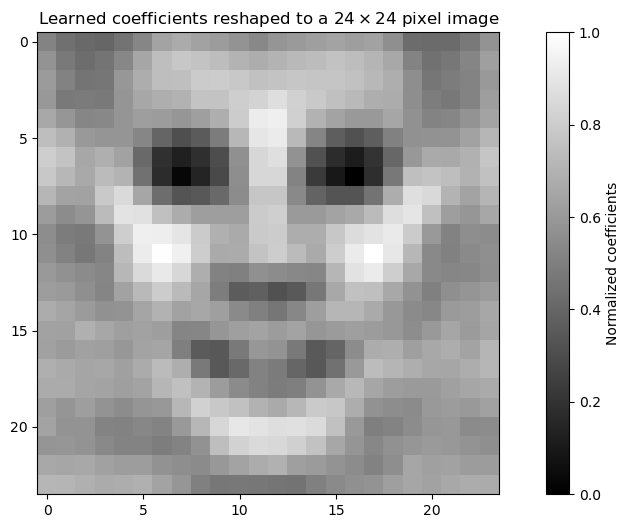

In [38]:
# Read out coefficients
coef = facedetection.coef_
coef_n = (coef - np.min(coef))/(np.max(coef) - np.min(coef))

# Reshape coefficients to 24 by 24 pixels image
coef_reshaped = np.reshape(coef_n, [24, 24], order='F')

# Plot the learned coefficients as grayscale image
plt.title('Learned coefficients reshaped to a $24\\times 24$ pixel image')
img = plt.imshow(coef_reshaped)
plt.colorbar(img, label='Normalized coefficients')
plt.show()

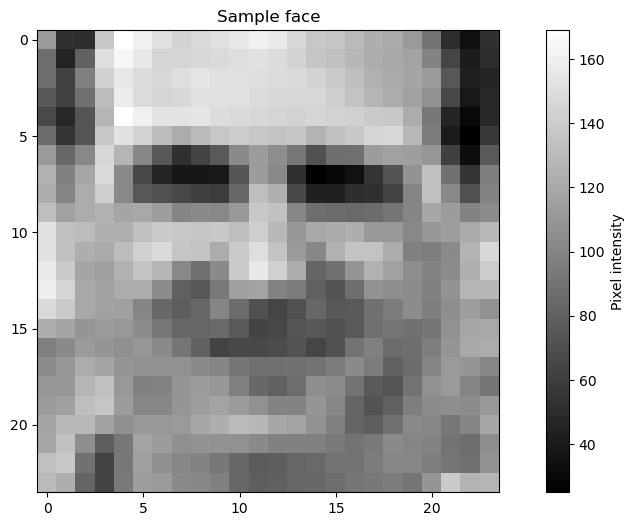

In [39]:
# Plot a face
idx = 4926
if labels[idx] == 1:
    im = plt.imshow(data[idx, :].reshape([24,24], order='F'))
    plt.title('Sample face')
    plt.colorbar(im, label='Pixel intensity')
else:
    while labels[idx] != 1:
        idx = idx + 1
        if labels[idx] == 1:
            plt.imshow(data[idx, :].reshape([24,24], order='F'))
            plt.title('Sample face')
            plt.colorbar(im, label='Pixel intensity')

The visualization of the learned coefficients for the logistic regression on faces classification suggests, that particular emphasis for the decision face/non-face is made with respect to the parts of the image, where the eyes, the nose and the mouth are to be expected. From the sample face pixel intensities as seen above, one can see that pixels have lower intensities for face-like properties of the image, such as eyes, nose (nostrils), the mouth and hair. If one considers the hypothesis function 
$$ f_\theta(\mathbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}} = p(y=1|\mathbf{x}) = p(y=\text{face}|\mathbf{x}),
$$
this can qualitatively understood. From the weights image, one can see that the weights are lower, where important face-like parts are located. It is important to note here, that $\mathbf{x}$ only contains positive values. Considering only one element $\theta_i$ of the weights vector $\theta$ and the corresponding feature (pixel) $x_i$ from the feature vector $\mathbf{x}$, one can write the hypothesis function as
$$
f_{\theta_i}(x_i) = \frac{1}{1 + e^{-\theta_i x_i}}, \qquad x_i \geq 0.
$$ 
Now, $f_{\theta_i}(x_i) \rightarrow 1$ for $\theta_i \rightarrow 0$, whereas $f_{\theta_i}(x_i) \rightarrow 0$ for $\theta_i \rightarrow \infty$. The first case we would expect, if the pixel belongs to a face; whereas the second case we would expect, if the pixel belongs to an arbitrary, non-facial picture. Hence, the observation that the weights are low, where important facial features are located, is plausibly explained!

## Task 12. Tuning the model [5 points]

The final task is to build a model that reaches as high accuracy on the test set as possible.
Feel free to use anything that you already know from the lectures/tutorials/this assignment by the time this assignment was given (i.e. the 4th week).

Justify your final choice of the model.

In [40]:
# Build model with scaled input
facedetection_advanced = Pipeline([('SC', StandardScaler()), ('LR', LogReg())])

# Fit and test model
facedetection_advanced.fit(X_train, y_train)

# Report scores on training and testing data
print('Accuracy of advanced LogReg on training data = ', facedetection_advanced.score(X_train, y_train))
print('Accuracy of advanced LogReg on testing data = ', facedetection_advanced.score(X_test, y_test))

Maximum allowed iterations reached!
Accuracy of advanced LogReg on training data =  0.9240023051433511
Accuracy of advanced LogReg on testing data =  0.9211764705882353


As a final model, the self-made logistic regression model was chosen; but as compared to the previous case, the data was normalized first before the model was trained on the data. Data normalization ensures, that the model coefficients are learned on a similar scale. As a model for the classification face/non-face, logistic regression is very much suited, so this model has been chosen as a final model.